In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
source = 'RealMadrid_Road_To_Wembly_UCL.mp4'
video_cap = cv2.VideoCapture(source) # read the video by creating the video capture object

In [17]:
# checking
if (video_cap.isOpened() == False):
    print("Error Opening Video")

In [11]:
# use the read method to retrieve the first frame of the video 
ret , frame = video_cap.read()

In [13]:
plt.imshow(frame[:,:,::-1])

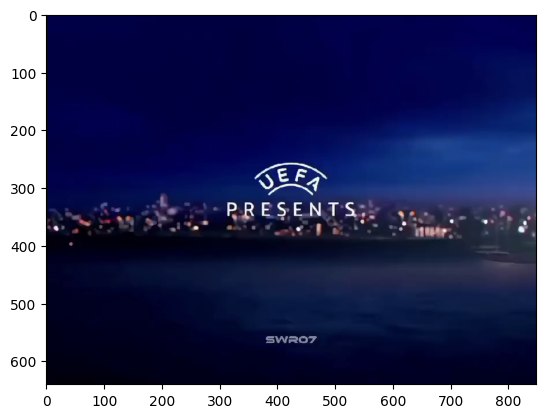

In [15]:
plt.show()

# Displaying the Video from file 

In [26]:
# load the video in the browser 
from IPython.display import HTML
HTML(""" 
<video width="1024" controls>
  <source src="RealMadrid_Road_To_Wembly_UCL.mp4" type="video/mp4">
</video>
""") #  # HTML allows us to embed HTML code directly into the notebook.

"""
1. <video> → Defines a video player in HTML.
2. width="1024" → Sets the width of the video to 1024 pixels.
3. controls → Enables play, pause, volume, and fullscreen buttons in the video player.

"""

# Write Video using OpenCV
For writing the video, we need to create a videowriter object with the right parameters.

### Function Syntax
VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )
where, Parameters

filename: Name of the output video file.

fourcc: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

fps: Framerate of the created video stream.

frameSize: Size of the video frames.

In [31]:
# getting the frame resolutions
frame_width = int(video_cap.get(3)) # function retrieves the width of the video frame.
frame_height  = int(video_cap.get(4)) # function retrieves the height of the video frame.
"""
Both values are initially in floating point format, so they are converted into integers using int().
🔹 Why convert to integers?
Video frames need integer dimensions for encoding.
Floating-point values are not valid for OpenCV's VideoWriter.
"""

## Creating VideoWriter Objects
out_avi = cv2.VideoWriter(
    "RealMadrid_Road_To_Wembly_UCL.avi", 
    cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, 
    (frame_width, frame_height)
)
"""
race_car_out.avi → The output file name where the video will be saved.

cv2.VideoWriter_fourcc("M", "J", "P", "G") → Uses the MJPG (Motion JPEG) codec.

30 → Specifies the frames per second (FPS), meaning the video will have 10 frames per second.

(frame_width, frame_height) → Specifies the video resolution (width × height).

📌 MJPG Codec:

Motion JPEG encodes each frame as a separate JPEG image.

It provides good quality but large file sizes.
"""

out_mp4 = cv2.VideoWriter(
    "RealMadrid_Road_To_Wembly_UCL.mp4", 
    cv2.VideoWriter_fourcc(*"XVID"), 
    10, 
    (frame_width, frame_height)
)


In [33]:
# Read until video is completed
while video_cap.isOpened():
    # Capture frame-by-frame
    ret, frame = video_cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [35]:
# When everything done, release the VideoCapture and VideoWriter objects
video_cap.release()
out_avi.release()
out_mp4.release()